# Rain in Australia
[https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data?select=weatherAUS.csv](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data?select=weatherAUS.csv)

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
def display_nan_proportion(dataframe: pd.DataFrame, dataframe_name: str = "le dataframe"):
    nan_proportions = (dataframe.isna().sum() / len(dataframe)) * 100
    nan_proportions = nan_proportions.sort_values(ascending=False)
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=nan_proportions.values, y=nan_proportions.index, hue=nan_proportions.index, palette='viridis', legend=False)
    plt.xlabel('Proportion de NaN (%)')
    plt.title(f'Proportions de NaN par colonne dans {dataframe_name}')
    plt.gca().invert_yaxis()  # La colonne avec le plus de NaN en bas
    plt.show()

In [193]:
def distribution_series(series:pd.Series):
    series = series.fillna("NaN")
    plt.figure(figsize=(5, 3))
    value_counts = series.value_counts().sort_index() 
    ax = value_counts.plot(kind='bar', color='skyblue')
    ax.set_xlabel(series.name)
    ax.set_ylabel('Nombre de fois')
    ax.set_title(f'Distribution des valeurs de {series.name}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()

In [194]:
def fill_nan_with_mode(dataframe, subset, inplace=False):
    """
    Remplace les valeurs NaN des colonnes spécifiées par le mode de chaque colonne.
    
    Args:
        dataframe (pd.DataFrame): Le DataFrame contenant les colonnes à traiter.
        subset (list): La liste des noms de colonnes à traiter.
        inplace (bool): Si True, remplace les NaN dans le DataFrame d'origine. Sinon, crée une copie avec les modifications.

    Returns:
        pd.DataFrame or None: Le DataFrame modifié avec les valeurs NaN remplacées par le mode (si inplace=False).
    """
    if inplace:
        for column_name in subset:
            mode_value = dataframe[column_name].mode().values[0]
            dataframe[column_name].fillna(mode_value, inplace=True)
        return None
    else:
        # Créez une copie du DataFrame pour éviter de modifier l'original
        modified_dataframe = dataframe.copy()
        for column_name in subset:
            mode_value = modified_dataframe[column_name].mode().values[0]
            modified_dataframe[column_name].fillna(mode_value, inplace=True)
        return modified_dataframe


In [195]:
weatherAUS = pd.read_csv('weatherAUS.csv')

## EDA - Analyse exploratoire des données 

In [196]:
len(weatherAUS)

145460

In [197]:
weatherAUS['Date'] = pd.to_datetime(weatherAUS['Date'])
weatherAUS['Month'] = weatherAUS['Date'].dt.month
weatherAUS['Year'] = weatherAUS['Date'].dt.year
weatherAUS.drop(['Date'], axis=1, inplace=True)

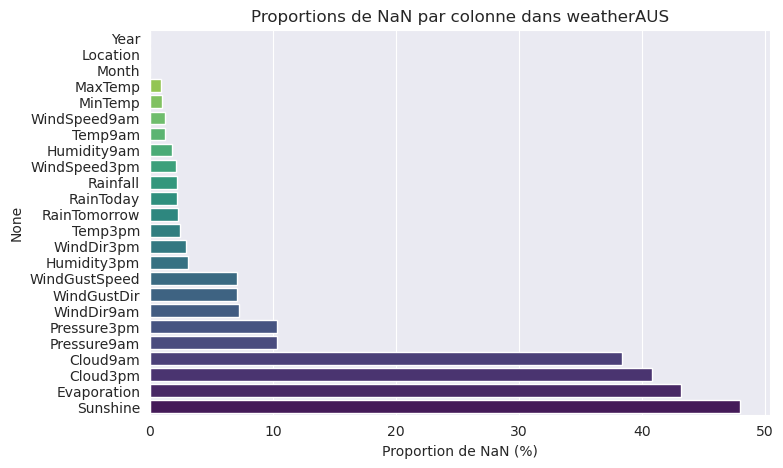

In [198]:
display_nan_proportion(dataframe=weatherAUS, dataframe_name="weatherAUS")

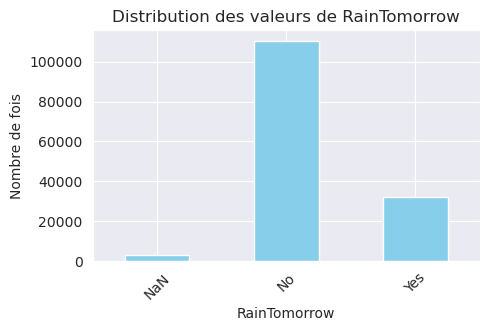

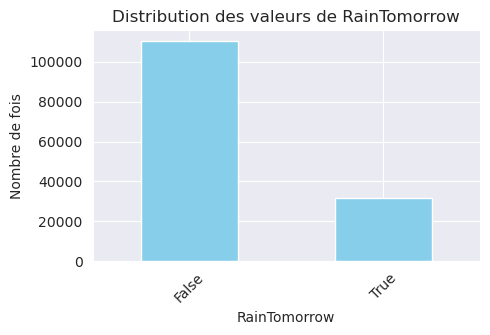

In [199]:
distribution_series(weatherAUS['RainTomorrow'])
weatherAUS.dropna(subset=['RainTomorrow'], inplace=True)
weatherAUS['RainTomorrow'] = weatherAUS['RainTomorrow'].map({'Yes': True, 'No': False})
distribution_series(weatherAUS['RainTomorrow'])

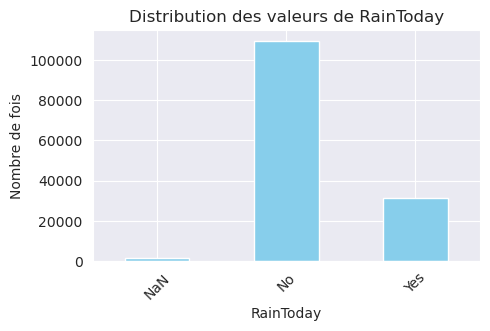

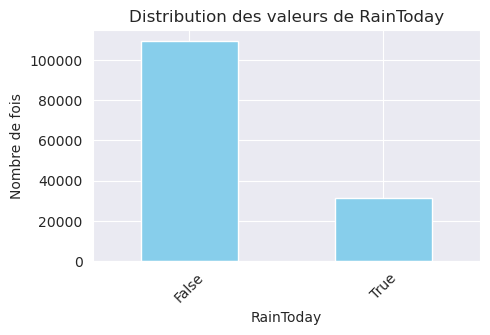

In [200]:
distribution_series(weatherAUS['RainToday'])
weatherAUS.dropna(subset=['RainToday'], inplace=True)
weatherAUS['RainToday'] = weatherAUS['RainToday'].map({'Yes': True, 'No': False})
distribution_series(weatherAUS['RainToday'])

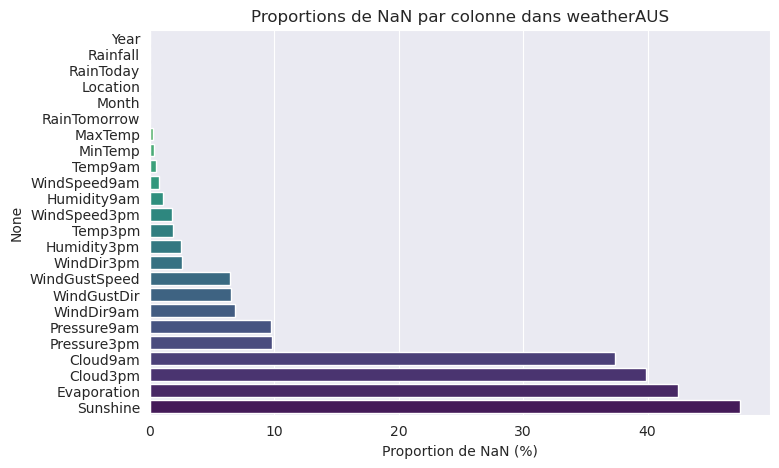

In [201]:
display_nan_proportion(dataframe=weatherAUS, dataframe_name="weatherAUS")

Suppression des colonnes ayant plus de 10% de NaN

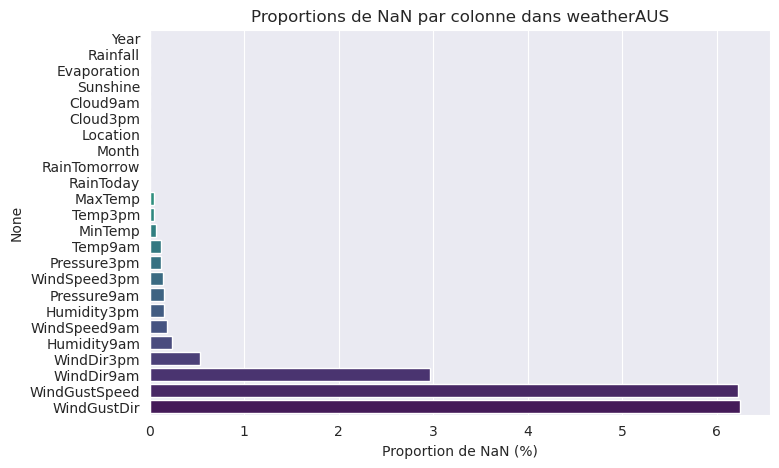

In [202]:
weatherAUS.dropna(subset=['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], inplace=True)
display_nan_proportion(dataframe=weatherAUS, dataframe_name="weatherAUS")

Remplacement des NaN par le mode pour les colonnes ayant moins de 10% de NaN

In [203]:
fill_nan_with_mode(dataframe=weatherAUS,
                   subset=['WindGustDir',
                           'WindGustSpeed',
                           'WindDir9am',
                           'WindDir3pm',
                           'Humidity9am',
                           'Humidity3pm',
                           'WindSpeed9am',
                           'WindSpeed3pm',
                           'Pressure9am',
                           'Pressure3pm',
                           'Temp9am',
                           'Temp3pm',
                           'MinTemp',
                           'MaxTemp'
                           ],
                   inplace=True)

/tmp/ipykernel_30765/1493080687.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[column_name].fillna(mode_value, inplace=True)


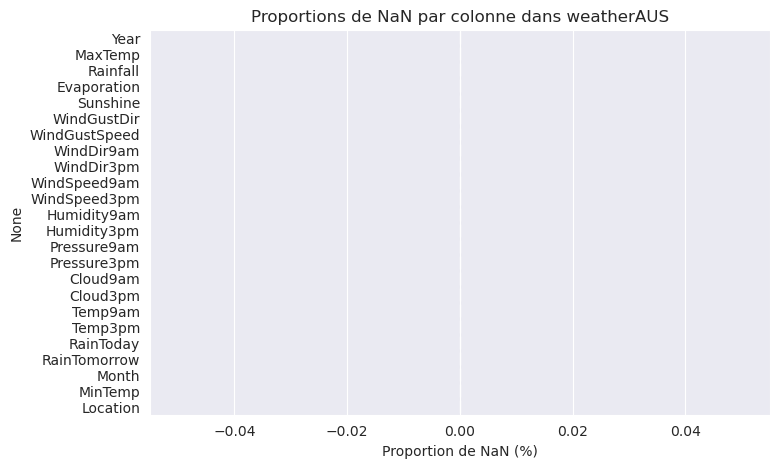

In [204]:
display_nan_proportion(dataframe=weatherAUS, dataframe_name="weatherAUS")

In [187]:
len(weatherAUS)

62294

# ==============================================================================================

In [189]:
weatherAUS = pd.get_dummies(data=weatherAUS, columns=['WindGustDir', 'WindDir3pm', 'WindDir9am', 'Location', 'Month', 'Year'])
weatherAUS

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,False,True,False,False,False,False,False,False,False,False
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,False,True,False,False,False,False,False,False,False,False
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,False,True,False,False,False,False,False,False,False,False
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,False,True,False,False,False,False,False,False,False,False
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,...,False,False,False,False,False,False,False,False,False,True
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,...,False,False,False,False,False,False,False,False,False,True
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,...,False,False,False,False,False,False,False,False,False,True
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,...,False,False,False,False,False,False,False,False,False,True


## Feature importance

In [190]:
will_rain = weatherAUS[weatherAUS['RainTomorrow']==1]
will_rain

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
6067,21.4,37.5,0.0,14.8,6.9,43.0,26.0,9.0,34.0,29.0,...,False,True,False,False,False,False,False,False,False,False
6070,21.8,30.7,0.0,8.0,5.9,56.0,24.0,19.0,71.0,63.0,...,False,True,False,False,False,False,False,False,False,False
6071,20.3,36.0,18.0,8.2,10.5,94.0,13.0,7.0,89.0,50.0,...,False,True,False,False,False,False,False,False,False,False
6082,23.6,40.4,0.6,11.8,12.2,54.0,9.0,11.0,42.0,17.0,...,False,True,False,False,False,False,False,False,False,False
6092,16.8,23.3,0.6,8.0,2.3,63.0,35.0,35.0,66.0,53.0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142227,25.1,31.8,1.2,4.6,0.0,54.0,15.0,28.0,73.0,55.0,...,False,False,False,False,False,False,False,False,False,True
142228,20.6,21.9,23.4,6.4,0.0,52.0,22.0,31.0,95.0,95.0,...,False,False,False,False,False,False,False,False,False,True
142233,25.0,33.1,0.0,4.4,9.8,35.0,9.0,20.0,77.0,51.0,...,False,False,False,False,False,False,False,False,False,True
142236,25.2,33.5,0.0,4.8,11.2,37.0,13.0,17.0,70.0,46.0,...,False,False,False,False,False,False,False,False,False,True
